In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from wordcloud import WordCloud
import spacy
import string
from collections import Counter

In [89]:
nlp=spacy.load("en_core_web_sm")

In [90]:
df=pd.read_csv("C:\\Users\\hp\\Downloads\\nlpanalytics\\data\\cleaned_nlp_data.csv")

In [91]:
model=joblib.load("C:\\Users\\hp\\Downloads\\nlpanalytics\\notebooks\\sentiment_model.pkl")
vectorizer=joblib.load("C:\\Users\\hp\\Downloads\\nlpanalytics\\notebooks\\tfidf_vectorizer.pkl")

In [92]:
#vectorizing the text column
X= vectorizer.transform(df['Text'])

In [93]:
df['predicted_sentiment']=model.predict(X)

In [94]:
#Hhow many postives/negatives/neutral?
summary_count=df['predicted_sentiment'].value_counts()
print("Sentiment Distribution:\n",summary_count)
      

Sentiment Distribution:
 predicted_sentiment
Positive    49
Negative    47
Name: count, dtype: int64


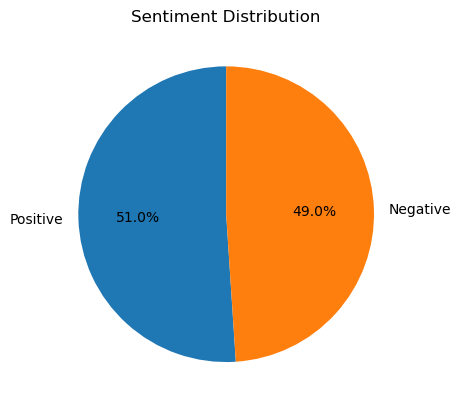

In [95]:
#visualization using pie chart
summary_count.plot.pie(autopct='%1.1f%%',startangle=90,title='Sentiment Distribution',ylabel="")
plt.show()

In [96]:
spacy_stopwords=nlp.Defaults.stop_words
#separating the texts
positive_texts=' '.join(df[df['predicted_sentiment']=='Postive']['Text'])
negative_texts=' '.join(df[df['predicted_sentiment']=='Negative']['Text'])                        

In [97]:
df['Sentiment'].value_counts()


Sentiment
Positive    53
Negative    43
Name: count, dtype: int64

In [98]:
positive_texts = df[df['Sentiment'] == 'Positive']['Text'].str.cat(sep=' ')
negative_texts = df[df['Sentiment'] == 'Negative']['Text'].str.cat(sep=' ')


In [99]:
print("Length of positive_texts:", len(positive_texts))
print("Length of negative_texts:", len(negative_texts))


Length of positive_texts: 3009
Length of negative_texts: 2470


In [100]:
if positive_texts:
    wc_pos = WordCloud(width=800, height=400, background_color='white').generate(positive_texts)
else:
    print("No positive texts found.")

if negative_texts:
    wc_neg = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(negative_texts)
else:
    print("No negative texts found.")


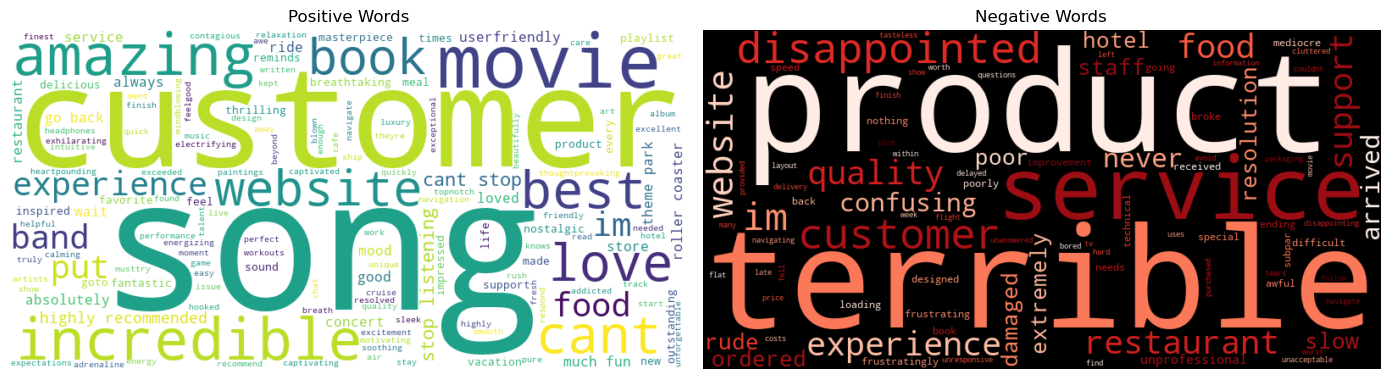

In [101]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.imshow(wc_pos, interpolation='bilinear')
plt.title("Positive Words")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wc_neg, interpolation='bilinear')
plt.title("Negative Words")
plt.axis('off')
plt.tight_layout()
plt.show()


In [102]:
def get_top_words_spacy(text_series,n=10):
    all_words=" ".join(text_series.dropna())
    doc=nlp(all_words)
    words=[token.text.lower() for token in doc if not token.is_stop and not token.is_punct and not token.like_num]
    return Counter(words).most_common(n)  
top_pos = get_top_words_spacy(df[df['predicted_sentiment'] == 'Positive']['Text'])
top_neg = get_top_words_spacy(df[df['predicted_sentiment'] == 'Negative']['Text'])

print("Top Positive Words:", top_pos)
print("Top Negative Words:", top_neg)           
           

Top Positive Words: [('nt', 8), ('song', 8), ('movie', 5), ('amazing', 5), ('incredible', 5), ('book', 5), ('highly', 5), ('best', 4), ('stop', 4), ('listening', 4)]
Top Negative Words: [('product', 13), ('terrible', 11), ('customer', 11), ('service', 10), ('disappointed', 10), ('m', 8), ('website', 8), ('support', 7), ('food', 7), ('restaurant', 7)]


In [107]:

def get_top_words_spacy(text_series, n=10):
    all_words = " ".join(text_series.dropna())
    doc = nlp(all_words)
    
    exclude_tokens = {'nt', 'm', 't', 's', 'll', 're', 've', 'd'}
    words = [
        token.text.lower()
        for token in doc
        if (
            not token.is_stop and
            not token.is_punct and
            not token.like_num and
            token.text.lower() not in exclude_tokens
        )
    ]
    
    return Counter(words).most_common(n)

# Rerun with the cleaned-up logic
top_pos = get_top_words_spacy(df[df['predicted_sentiment'] == 'Positive']['Text'])
top_neg = get_top_words_spacy(df[df['predicted_sentiment'] == 'Negative']['Text'])

print("Top Positive Words:", top_pos)
print("Top Negative Words:", top_neg)


Top Positive Words: [('song', 8), ('movie', 5), ('amazing', 5), ('incredible', 5), ('book', 5), ('highly', 5), ('best', 4), ('stop', 4), ('listening', 4), ('recommended', 4)]
Top Negative Words: [('product', 13), ('terrible', 11), ('customer', 11), ('service', 10), ('disappointed', 10), ('website', 8), ('support', 7), ('food', 7), ('restaurant', 7), ('quality', 6)]


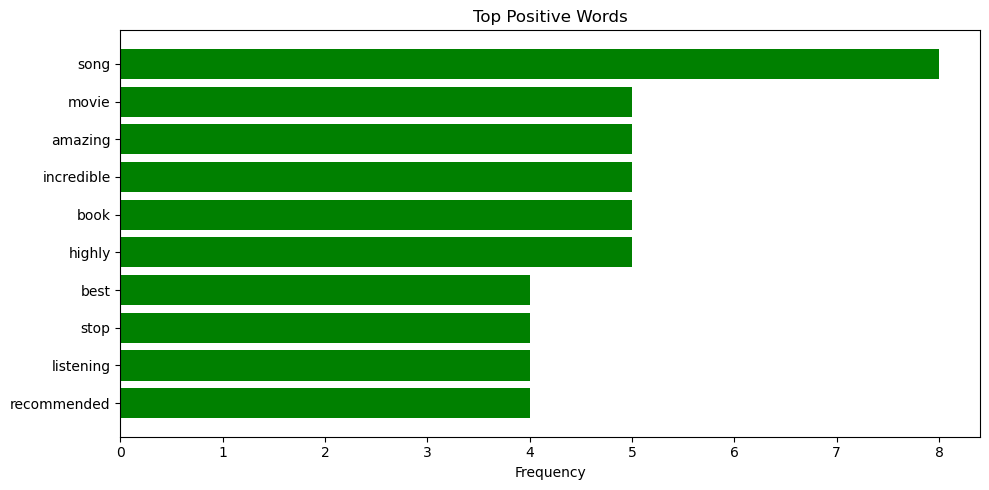

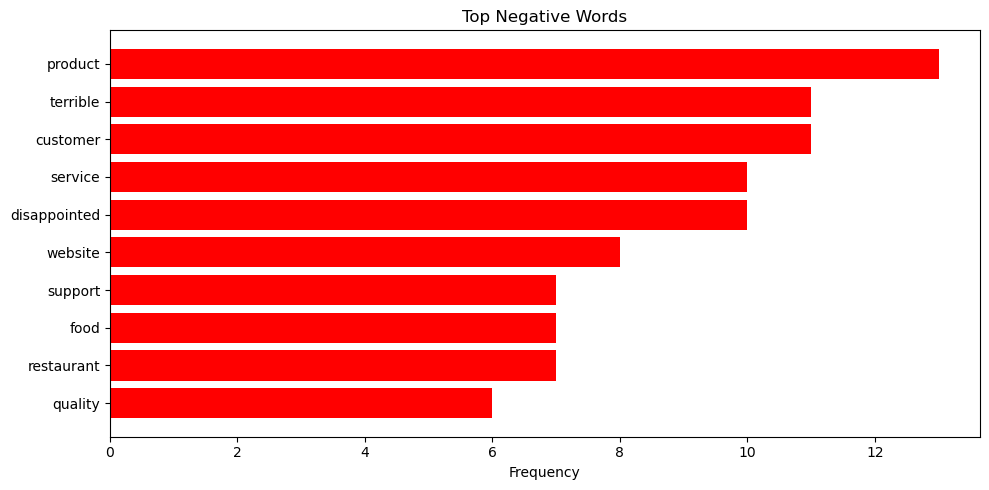

In [108]:

def plot_top_words(top_words, title, color):
    words, counts = zip(*top_words)
    plt.figure(figsize=(10,5))
    plt.barh(words[::-1], counts[::-1], color=color)
    plt.title(title)
    plt.xlabel("Frequency")
    plt.tight_layout()
    plt.show()

plot_top_words(top_pos, "Top Positive Words", "green")
plot_top_words(top_neg, "Top Negative Words", "red")


In [105]:
df.to_csv("C:\\Users\\hp\\Downloads\\nlpanalytics\\data\\sentiment_predictions.csv",index=False)